In [2]:
%matplotlib inline
import matplotlib
import random
import torch
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


In [3]:
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)


features: tensor([-0.2404, -1.3864]) 
label: tensor([8.4296])


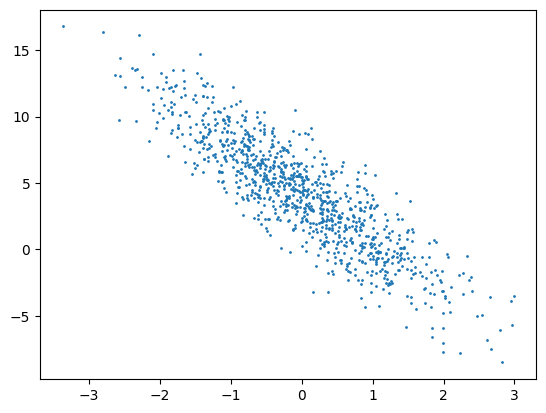

In [14]:
from torch import tensor
print('features:', features[0],'\nlabel:', labels[0])
features: tensor([-0.3679, -1.8471]) 
label: tensor([9.7361])
matplotlib.pyplot.scatter(features[:, 1], labels, 1);


In [5]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]


In [6]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break


tensor([[-0.4681, -0.2203],
        [-0.2092,  0.6161],
        [-1.3175,  2.6660],
        [-1.5323, -0.9055],
        [-1.4292,  0.3187],
        [-0.5419, -0.3868],
        [ 0.9348,  0.2286],
        [ 0.0380, -0.1781],
        [ 1.6907, -0.5895],
        [ 0.9202, -0.7403]]) 
 tensor([[ 3.9874],
        [ 1.7102],
        [-7.5145],
        [ 4.2092],
        [ 0.2724],
        [ 4.4370],
        [ 5.2705],
        [ 4.8813],
        [ 9.5795],
        [ 8.5687]])


In [7]:
#初始化模型参数

w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)


In [7]:
#初始化模型参数

w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)


In [8]:
#定义模型
def linreg(X, w, b):  #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b


In [9]:
#定义损失函数]
def squared_loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2


In [10]:
#定义优化算法)
def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()


In [11]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')


epoch 1, loss 0.031174
epoch 2, loss 0.000111
epoch 3, loss 0.000051


In [12]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')


w的估计误差: tensor([-2.7633e-04, -3.7909e-05], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0009], grad_fn=<RsubBackward1>)
